In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#needed to import qke procedures
import sys
from pathlib import Path

main_dir = str(Path().resolve().parent)
sys.path.insert(1, main_dir)

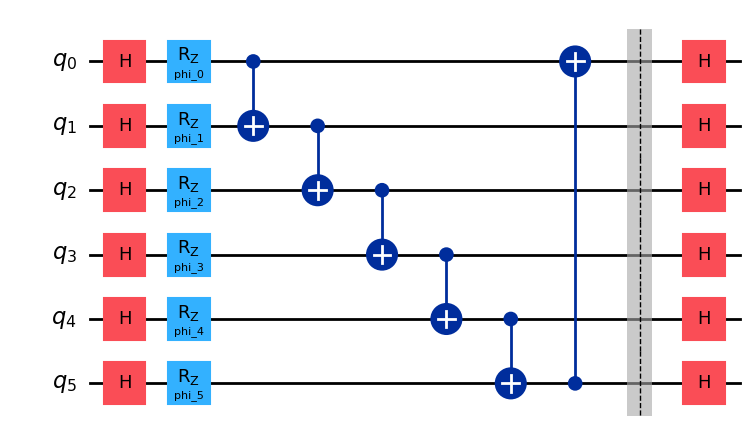

In [3]:
from qke.qproc import Circuits

q_template = Circuits.circularEnt(6)
q_template.draw('mpl')

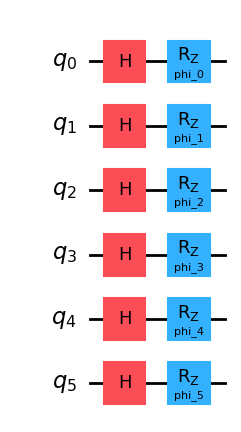

In [4]:
#only encoding
q_template_eo = Circuits.encodedOnly(6)
q_template_eo.draw('mpl')

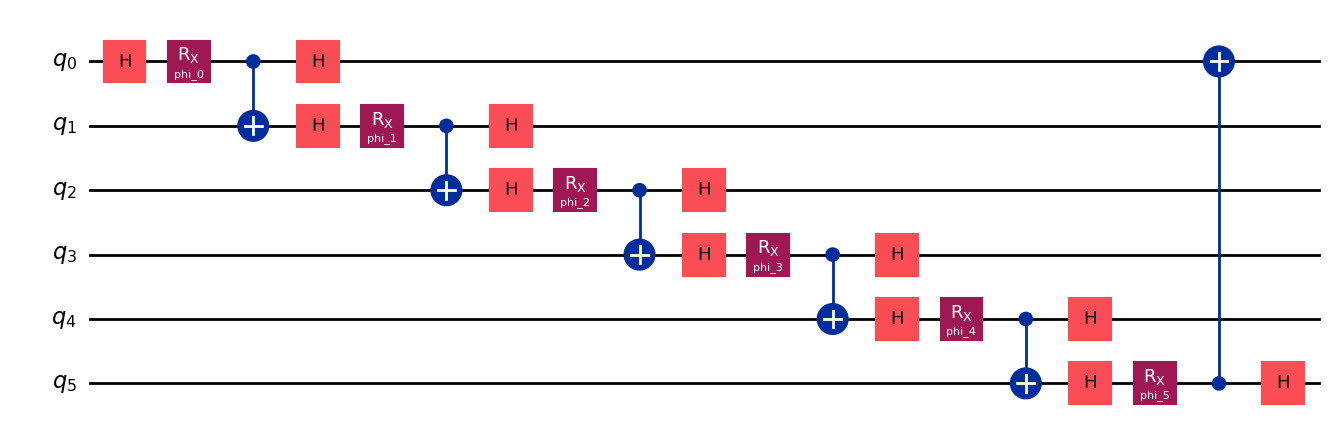

In [5]:
q_template_1 = Circuits.cascade(6)
q_template_1.draw('mpl')

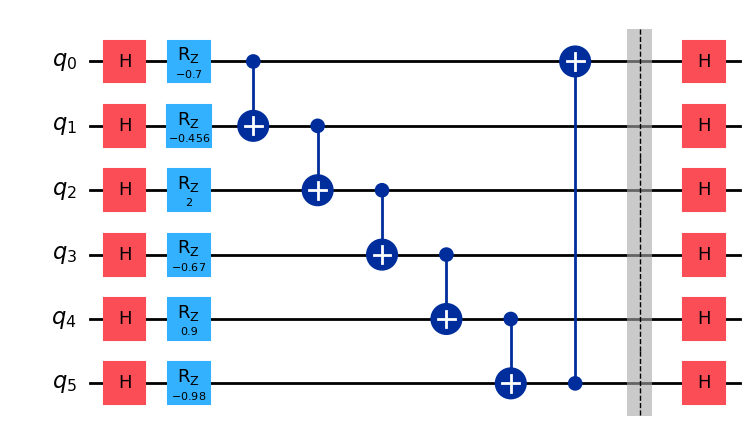

In [9]:
from qke.qproc import qEncoding

my_q_assigned = qEncoding(q_template, [-0.6998,-0.4564,2,-0.67,0.9,-0.98])
my_q_assigned.draw('mpl')

In [10]:
from qke.qproc import evalObsAer
from qke.qproc import evalObsPrimitive
from qke.qproc import evalObsStateVector

#try evaluatin function
a = evalObsAer(qc=my_q_assigned, observables=["ZIIIII","IZIIII", "IIZIII", "IIIZII","IIIIZI",'IIIIIZ'])
b = evalObsPrimitive(qc=my_q_assigned, observables=["ZIIIII","IZIIII", "IIZIII", "IIIZII","IIIIZI",'IIIIIZ'])
c = evalObsStateVector(qc=my_q_assigned, observables=["ZIIIII","IZIIII", "IIZIII", "IIIZII","IIIIZI",'IIIIIZ'])

In [11]:
print(type(a))
print(a)
print(b)
print(c)

<class 'numpy.ndarray'>
[ 0.38249197  0.34625077  0.48723136 -0.32618491 -0.37355209  0.68667233]
[ 0.33730284  0.25658919  0.45427937 -0.24080756 -0.16186738  0.69670888]
[ 0.38249197  0.34625077  0.48723136 -0.32618491 -0.37355209  0.68667233]


In [59]:
import numpy as np
tr = np.array([1.23456,2,3,1])

np.array_str(tr)







'[1.23456 2.      3.      1.     ]'

In [47]:
q_template_polar = Circuits.encodingY(6)

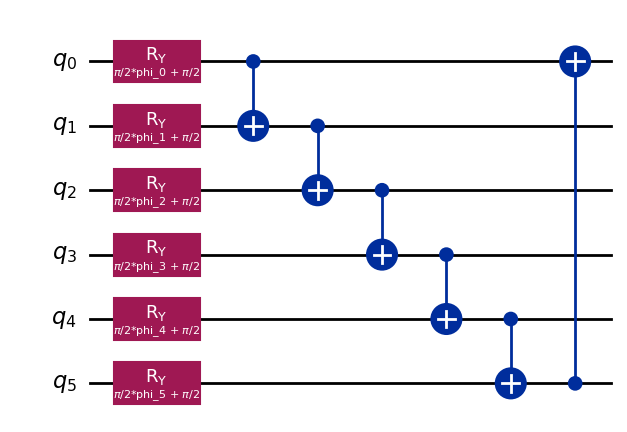

In [48]:
q_template_polar.draw('mpl')

In [49]:
my_q_assigned_p = qEncoding(q_template_polar, [-0.6998,-0.4564,0.2,-0.67,0.9,-0.98])

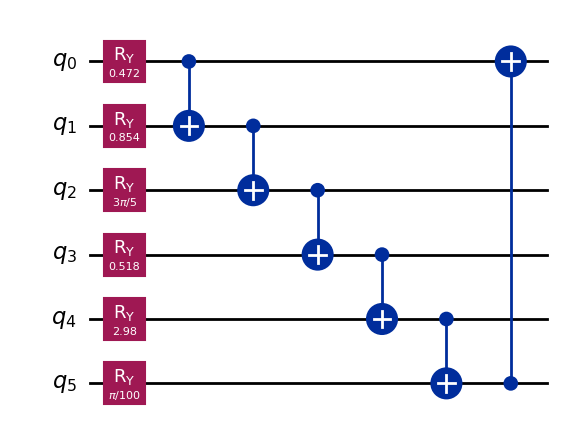

In [50]:
my_q_assigned_p.draw('mpl')

In [51]:
a_ = evalObsAer(qc=my_q_assigned_p, observables=["ZIIIII","IZIIII", "IIZIII", "IIIZII","IIIIZI",'IIIIIZ'])
#b_ = evalObsPrimitive(qc=my_q_assigned_p, observables=["ZIIIII","IZIIII", "IIZIII", "IIIZII","IIIIZI",'IIIIIZ'])
c_ = evalObsStateVector(qc=my_q_assigned_p, observables=["ZIIIII","IZIIII", "IIZIII", "IIIZII","IIIIZI",'IIIIIZ'])

In [52]:
print(a_)
#print(b_)
print(c_)

[ 0.15510992  0.1551865  -0.15712092 -0.18088328  0.58535059  0.17411182]
[ 0.12212661  0.37319178 -0.24785936 -0.15014277  0.66496679  0.20655717]
[ 0.15510992  0.1551865  -0.15712092 -0.18088328  0.58535059  0.17411182]
